In [131]:
import os
import sys; sys.path.append('..')
import numpy as np

data_dir = '../data/CUB_200_2011'
attrs = np.load(os.path.join(data_dir, 'attributes_normalized.npy'))
attrs = torch.from_numpy(attrs)
attrs = (attrs - attrs.mean(dim=0, keepdim=True)) / attrs.std(dim=0, keepdim=True)

In [157]:
import pandas as pd

In [169]:
with open(f'{data_dir}/attributes/class_attribute_labels_continuous.txt') as f:
    lines = f.read().splitlines()
    attrs_raw = [list(map(float, l.split())) for l in lines]
    attrs_raw = torch.tensor(attrs_raw)

In [172]:
attrs_raw = attrs_raw / attrs_raw.norm(dim=1, keepdim=True)

In [132]:
attrs.std(axis=0).abs().mean()

tensor(1., dtype=torch.float64)

In [207]:
cov.sum()

tensor(2373.1604, dtype=torch.float64)

In [9]:
import random

n_classes = attrs.shape[0]
n_dims = attrs.shape[1]
idx_seen = random.sample(range(n_classes), 100)
idx_unseen = [i for i in range(n_classes) if not i in idx_seen]

attrs_seen = attrs[idx_seen].float()
attrs_unseen = attrs[idx_unseen].float()

In [134]:
cov = compute_covariance(attrs)

In [135]:
cov.diag().mean()

tensor(1., dtype=torch.float64)

In [140]:
covariances = cov[np.tril_indices(312, k=-1)].abs()

In [156]:
np.percentile(covariances, 90)

0.35860428696998287

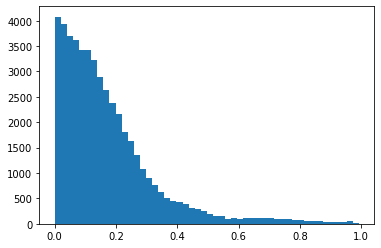

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(covariances, bins=50);

In [ ]:
plt.hist(torch.randn)

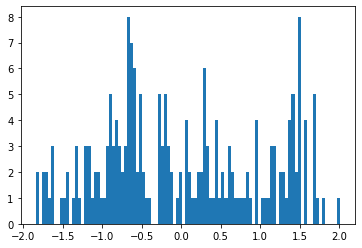

In [199]:
plt.hist(attrs[:, 20], bins=100);

In [42]:
from torch import Tensor


def compute_covariance(feats: Tensor) -> Tensor:
    """
    Computes empirical covariance matrix for a batch of feature vectors
    """
    assert feats.ndim == 2

    feats -= feats.mean(dim=0)
    cov_unscaled = feats.t() @ feats # [feat_dim, feat_dim]
    cov = cov_unscaled / (feats.size(0) - 1)

    return cov

In [93]:
cov = compute_covariance(attrs_seen) + torch.eye(n_dims) * 0.83

In [95]:
torch.det(cov)

tensor(0.6499)

In [58]:
import torch
from torch.distributions.multivariate_normal import MultivariateNormal

dist = MultivariateNormal(loc=torch.zeros(n_dims), covariance_matrix=cov)

In [77]:
print(dist.log_prob(attrs_seen).mean().item())
print(dist.log_prob(attrs_unseen).mean().item())

-302.2752685546875
-358.6435852050781


In [86]:
alphas = torch.rand(100) * 0.6 + 0.2
alphas = alphas.unsqueeze(1)

In [87]:
random_seen_attrs_lhs = torch.stack([attrs_seen[i] for i in random.choices(range(100), k=100)])
random_seen_attrs_rhs = torch.stack([attrs_seen[i] for i in random.choices(range(100), k=100)])

attrs_h = alphas * random_seen_attrs_lhs + (1 - alphas) * random_seen_attrs_rhs

In [88]:
dist.log_prob(attrs_h).mean()

tensor(-295.4601)